### 생선분류
- 데이터 셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습 알고리즘 : 최근접이웃 알고리즘

[1] 데이터 준비

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data_file = '../data/fish.csv'

In [43]:
# 행 : Bream, Smelt, 컬럼 :  Species, Weight, Length => 0,1,2
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [44]:
mask = (fishDF['Species']=='Bream') | (fishDF['Species']=='Smelt')
fishDF = fishDF[mask]

In [45]:
fishDF.reset_index(drop=True,inplace=True)
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [46]:
# 품종 컬럼을 수치화 => Bream 0, Smelt 1
fishDF['FCode'] = fishDF['Species'].replace({'Bream':0,'Smelt':1})

[2] 피쳐와 타켓 분리

In [47]:
features = fishDF[['Weight', 'Length']]
target = fishDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# train:test = 80:20 ===> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타켓의 종류에 대한 비율을 고려
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10)

In [50]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'Y_train : {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (39, 2), 2D
Y_train : (39,), 1D
X_test : (10, 2), 2D
Y_test : (10,), 1D


In [51]:
# target0(Bream), 1(Smelt)의 비율
Y_train.value_counts()[0]/Y_train.shape[0], Y_train.value_counts()[1]/Y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [52]:
Y_test.value_counts()[0]/Y_test.shape[0],Y_test.value_counts()[1]/Y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# 스케일러 인스턴스 생성
mmscaler = MinMaxScaler()

In [55]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmscaler.fit(X_train)

MinMaxScaler()

In [56]:
mmscaler.min_, mmscaler.data_min_, mmscaler.scale_,mmscaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [57]:
# 학습용 데이터셋 ==> 스케일링
X_train_scaled = mmscaler.transform(X_train)
X_train_scaled.shape,X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [58]:
# 테스트용 데이터셋 ==> 스케일링
X_test_scaled = mmscaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/ 학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [61]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [62]:
# 학습 후 모델 파라미터 
model.classes_, model.n_samples_fit_
# model.feature_names_in_ <== ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능 평가 ==> score() 메서드 + 테스트 데이터셋

In [63]:
model.score(X_test_scaled,Y_test)

1.0

[6] 예측하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항 : 입력데이터 ==> 2D

In [72]:
new_data = pd.DataFrame([[413,27.8]],columns=['Weight', 'Length'])
new_data

,Weight,Length
0,413,27.8


In [75]:
new_data_scaled = mmscaler.transform(new_data)

In [76]:
# 임의의 새로운 데이터의 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

In [77]:
### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data_scaled)

In [78]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [90]:
neighbors = index.reshape(-1).tolist()
neighbors

[25, 22, 21, 0, 6]

In [88]:
X_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [91]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

print(new_data_scaled)
k_weight, k_length

[[0.40904057 0.57692308]]


(array([0.42615524, 0.35870331, 0.44629014, 0.38588543, 0.44629014]),
 array([0.61538462, 0.61538462, 0.63782051, 0.6474359 , 0.6474359 ]))

In [82]:
new_data['Weight'], new_data['Length']

(0    413
 Name: Weight, dtype: int64,
 0    27.8
 Name: Length, dtype: float64)

In [101]:
X_train_scaled[:,0], X_train_scaled[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

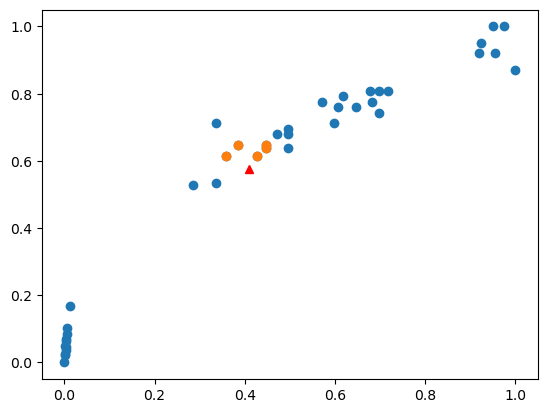

In [103]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0],new_data_scaled[0,1], 'r^')
plt.scatter(k_weight, k_length)
plt.show()